In [116]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np

%matplotlib inline
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [77]:
# 코스피 데이터 불러오기

df = fdr.DataReader('033780','2000-12-01')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-12-01,17300,19100,17300,19000,316670,0.067416
2000-12-04,19000,19000,18100,18250,164070,-0.039474
2000-12-05,18250,18950,18250,18800,228580,0.030137
2000-12-06,19000,19300,18400,18450,437600,-0.018617
2000-12-07,18500,18600,18150,18500,293300,0.002710
...,...,...,...,...,...,...
2021-08-23,80900,80900,80500,80500,363586,0.001244
2021-08-24,80600,81600,80500,81300,387090,0.009938
2021-08-25,81100,81800,81000,81500,247876,0.002460


In [78]:
# 불린저밴드 함수 만들기

n = 20
sigma = 2
def bollinger_band(df,n,sigma):
    bb = df.copy()
    bb['center'] = df['Close'].rolling(n).mean()
    bb['ub'] = bb['center'] + sigma * df['Close'].rolling(n).std()
    bb['lb'] = bb['center'] - sigma * df['Close'].rolling(n).std()
    bb = bb.loc[:,['Close','ub','center','lb']]
    return bb
bollinger = bollinger_band(df,n,sigma)

In [79]:
# 수익률의 기준이 되는 날짜 base_date =

base_date = '2009-01-02'
sample = bollinger.loc[base_date:]
sample

,Close,ub,center,lb
Date,,,,
2009-01-02,81000,86239.820616,80900.0,75560.179384
2009-01-05,78400,86104.800381,80980.0,75855.199619
2009-01-06,78400,86062.940780,81010.0,75957.059220
2009-01-07,77800,86085.951726,80995.0,75904.048274
2009-01-08,78500,86056.271522,80850.0,75643.728478
...,...,...,...,...
2021-08-23,80500,83566.803203,82035.0,80503.196797
2021-08-24,81300,83511.154728,81970.0,80428.845272
2021-08-25,81500,83439.915873,81915.0,80390.084127


<AxesSubplot:xlabel='Date'>

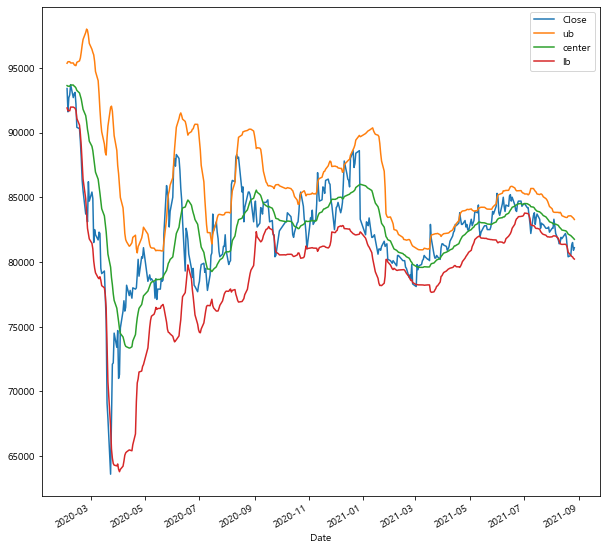

In [118]:
plt.rcParams["figure.figsize"] = (10,10)
sample.loc['2020-02':].plot()

In [81]:
# 거래내역 칼럼이 필요합니다. 


book = sample[['Close']].copy()
book['trade'] = ''
book

,Close,trade
Date,,
2009-01-02,81000,
2009-01-05,78400,
2009-01-06,78400,
2009-01-07,77800,
2009-01-08,78500,
...,...,...
2021-08-23,80500,
2021-08-24,81300,
2021-08-25,81500,


In [82]:
def create_trade_book(sample):
    book = sample[['Close']].copy()
    book['trade'] = ''
    return (book)

In [83]:
# 거래 전략

def tradings(sample,book):
    for i in sample.index:
        if sample.loc[i, 'Close'] > sample.loc[i, 'ub']:
            book.loc[i,'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Close']:
            if book.shift(1).loc[i,'trade'] == 'buy':
                book.loc[i,'trade'] = 'buy'
            else:
                book.loc[i,'trade'] = 'buy'
        elif sample.loc[i,'ub'] >= sample.loc[i,'Close'] and sample.loc[i, 'Close'] >= sample.loc[i, 'lb']:
            if book.shift(1).loc[i,'trade'] == 'buy':
                book.loc[i,'trade'] = 'buy'
            else:
                book.loc[i, 'trade'] = ''
    return (book)

In [84]:
# 2021-07-09에 진입하였다.
book =tradings(sample,book)
book.tail(50)

,Close,trade
Date,,
2021-06-18,85000,
2021-06-21,84400,
2021-06-22,84000,
2021-06-23,83900,
2021-06-24,84500,
2021-06-25,84700,
2021-06-28,84700,
2021-06-29,84300,
2021-06-30,84400,


<AxesSubplot:xlabel='Date'>

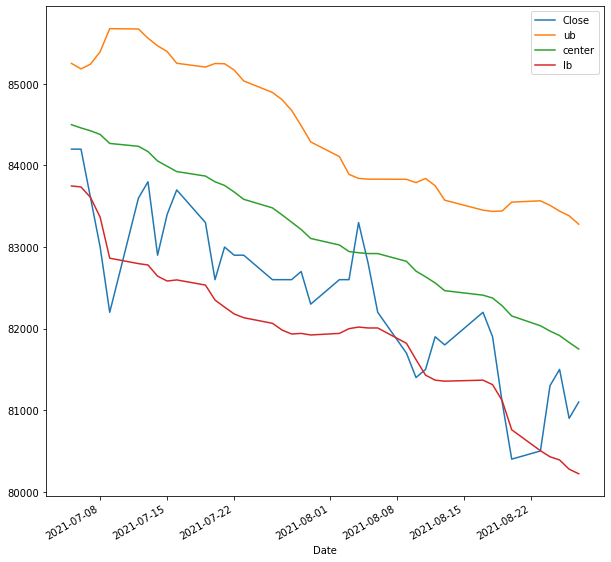

In [85]:
# 2021-07-09에 확실히 이탈했고.. 계속 이탈 상태가 유지되고 있다.
sample.loc['2021-07-05':].plot()

In [89]:
# 수익률 계산함수를 만들자.

def returns(book):
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        # long 진입
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':
            buy = book.loc[i, 'Close']
            print('진입일 : ',i, 'long 진입가격 : ', buy)
        # long 청산
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':
            sell =book.loc[i,'Close']
            rtn =(sell-buy) /buy + 1 #손익계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ', buy,' : long 청산가격 ',\
                 sell,' : return:',round(rtn,4))
            
    if book.loc[i,'trade'] == '':
        buy = 0.0
        sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i,'return']
        acc_rtn = acc_rtn * rtn
        book.loc[i,'acc return'] = acc_rtn
    print('Accumulated return :', round(acc_rtn,4))
    return (round(acc_rtn,4))

In [95]:
book['daily_rtn'] = book['Close'].pct_change()
book['st_rtn'] = (1+book['daily_rtn']).cumprod()
book

,Close,trade,return,acc return,daily_rtn,st_rtn
Date,,,,,,
2009-01-02,81000,,1.0,1.000000,NaN,NaN
2009-01-05,78400,,1.0,1.000000,-0.032099,0.967901
2009-01-06,78400,,1.0,1.000000,0.000000,0.967901
2009-01-07,77800,,1.0,1.000000,-0.007653,0.960494
2009-01-08,78500,,1.0,1.000000,0.008997,0.969136
...,...,...,...,...,...,...
2021-08-23,80500,buy,1.0,1.753794,0.001244,0.993827
2021-08-24,81300,buy,1.0,1.753794,0.009938,1.003704
2021-08-25,81500,buy,1.0,1.753794,0.002460,1.006173


In [96]:
print(returns(book))

진입일 :  2009-04-03 00:00:00 long 진입가격 :  72600
청산일 :  2009-07-30 00:00:00 long 진입가격 :  72600  : long 청산가격  72000  : return: 0.9917
진입일 :  2009-12-29 00:00:00 long 진입가격 :  65100
청산일 :  2010-02-01 00:00:00 long 진입가격 :  65100  : long 청산가격  69600  : return: 1.0691
진입일 :  2010-02-24 00:00:00 long 진입가격 :  63800
청산일 :  2010-06-01 00:00:00 long 진입가격 :  63800  : long 청산가격  62500  : return: 0.9796
진입일 :  2010-11-11 00:00:00 long 진입가격 :  62800
청산일 :  2010-12-09 00:00:00 long 진입가격 :  62800  : long 청산가격  66600  : return: 1.0605
진입일 :  2011-03-17 00:00:00 long 진입가격 :  54900
청산일 :  2011-04-27 00:00:00 long 진입가격 :  54900  : long 청산가격  62900  : return: 1.1457
진입일 :  2011-07-29 00:00:00 long 진입가격 :  65600
청산일 :  2011-08-18 00:00:00 long 진입가격 :  65600  : long 청산가격  68900  : return: 1.0503
진입일 :  2011-10-31 00:00:00 long 진입가격 :  69500
청산일 :  2011-12-07 00:00:00 long 진입가격 :  69500  : long 청산가격  81500  : return: 1.1727
진입일 :  2012-01-09 00:00:00 long 진입가격 :  77300
청산일 :  2012-03-27 00:00:00 long 진입가격 :  7730

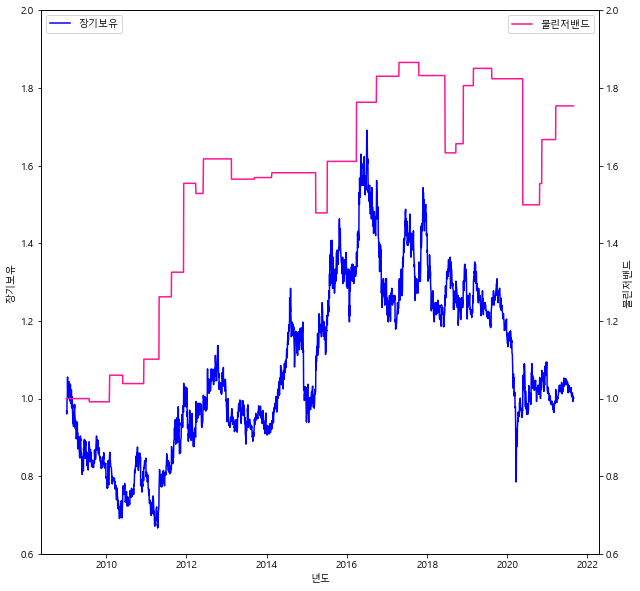

In [141]:
x = book.index
y1 = book['st_rtn']
y2 = book['acc return']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue', label= '장기보유')
ax1.set_xlabel('년도')
ax1.set_ylabel('장기보유')
ax1.legend(loc=2)
ax1.set_ylim(0.6,2)

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink', label= '불린저밴드')
ax2.set_ylabel('불린저밴드')
ax2.legend(loc=0)
ax2.set_ylim(0.6,2)


plt.show()